In [1]:
!pip install deepCR
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from deepCR import deepCR

     |████████████████████████████████| 3.2MB 2.8MB/s 
  Created wheel for deepCR: filename=deepCR-0.1.5-cp36-none-any.whl size=2928265 sha256=ef7529fe7b933121f0d2b022ce148915e12559e86d5b9dafb905be8d3924774c
  Stored in directory: /root/.cache/pip/wheels/60/42/3c/25ce5ca55e91baa5ffb2d5ef4eaaf6849e9abec3169ed0c94d
Successfully built deepCR


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
path =  '/content/drive/My Drive/Colab Notebooks/subimg_pair.npy'

In [0]:
# For training only
# subimg_pair = np.load(path,allow_pickle = True)[()]

# images = []
# masks = []
# ignores = []

# for val in subimg_pair.values():
#   img, mask, ign = val
#   images.append(img)
#   mask = np.ones_like(mask) - mask
#   masks.append(mask)
#   ignores.append(ign)

# images = np.array(images)
# masks = np.array(masks)
# ignores = np.array(ignores)

# del subimg_pair

ts_subimg_pair = np.load(path.replace('subimg_pair.npy','ts_subimg_pair.npy'),allow_pickle = True)[()]

ts_images = []
ts_masks = []
ts_ignores = []

for val in ts_subimg_pair.values():
  img, mask, ign = val
  ts_images.append(img)
  ts_masks.append(mask)
  ts_ignores.append(ign)

ts_images = np.array(ts_images)
ts_masks = np.array(ts_masks)
ts_ignores = np.array(ts_ignores)

del ts_subimg_pair, ign, mask, img

In [0]:
from deepCR import train

In [0]:
num = 9984
# del trainer

In [0]:
trainer = train(images[:num,:,:], masks[:num,:,:], name='mymodel', gpu=True, epoch=50,
                save_after=20, plot_every=10, use_tqdm=False)

In [0]:
trainer.train()

In [0]:
f_name = trainer.save()
print(f_name)
del trainer

2020-06-07_mymodel_epoch50


In [0]:
sample_mdl = deepCR(mask="ACS-WFC-F606W-2-32",
         inpaint="ACS-WFC-F606W-2-32",
             device="CPU")

In [0]:
demo = path.replace('subimg_pair.npy', 'jdba2sooq_flc.fits')
demo_img = fits.getdata(demo)[:512,:512]
test_mdl = deepCR(mask=path.replace('subimg_pair.npy','2020-06-07_mymodel_epoch50.pth'), hidden=32, device = 'CPU')
sample_mask, sample_cleaned_img = sample_mdl.clean(demo_img, threshold = 0.5)
demo_mask, demo_cleaned_img = test_mdl.clean(demo_img, threshold = 0.5)

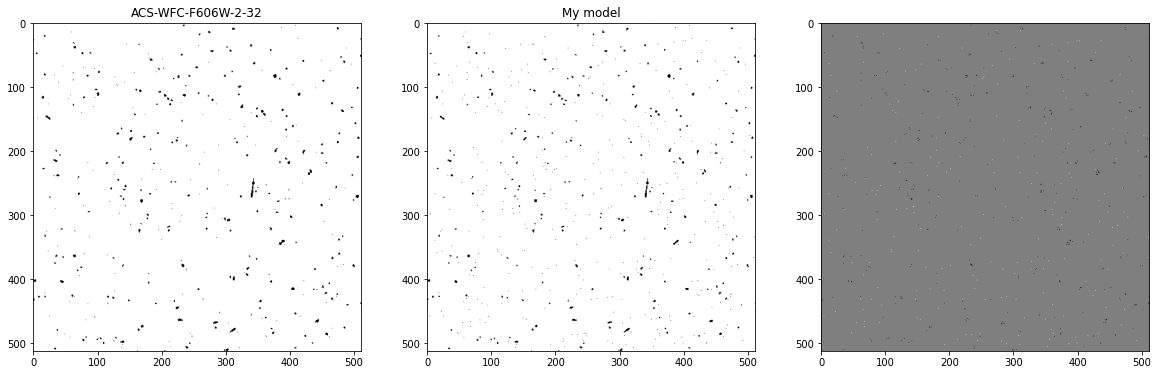

In [7]:
fig, axs = plt.subplots(1,3, figsize = (20,60), gridspec_kw={'width_ratios' : (20,20,20)})
axs[0].imshow(sample_mask, cmap = 'gray_r')
axs[1].imshow(demo_mask, cmap = 'gray_r')
im = axs[2].imshow(sample_mask-demo_mask, cmap = 'gray_r')
axs[0].set_title('ACS-WFC-F606W-2-32')
axs[1].set_title('My model')
plt.savefig(path.replace('subimg_pair.npy', 'mask_comparison.pdf'),format = 'pdf', bbox_inches = 'tight')

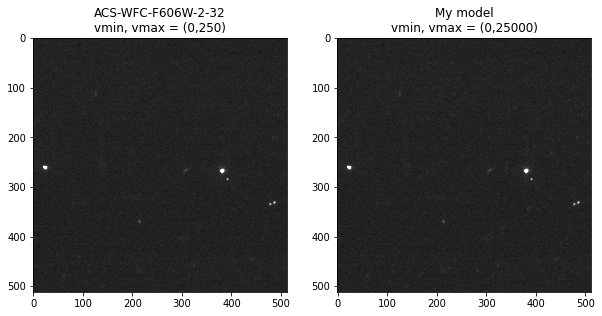

In [9]:
fig, axs = plt.subplots(1,2, figsize = (10,20), gridspec_kw={'width_ratios' : (10,10)})
axs[0].set_title('ACS-WFC-F606W-2-32\nvmin, vmax = (0,250)')
axs[1].set_title('My model\nvmin, vmax = (0,25000)')
axs[0].imshow(sample_cleaned_img, cmap = 'gray', vmin = 0, vmax = 250)
axs[1].imshow(demo_cleaned_img, vmin = 0, vmax = 25000,cmap = 'gray')
plt.savefig(path.replace('subimg_pair.npy','result.pdf'), format = 'pdf', bbox_inches  = 'tight')

In [0]:
from deepCR import evaluate
from deepCR import roc

100%|██████████| 4096/4096 [54:09<00:00,  1.26it/s]


result saved


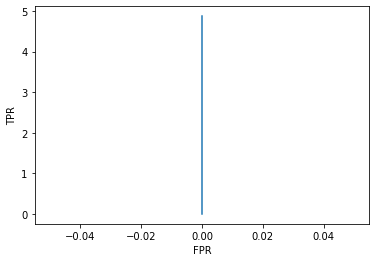

In [0]:
tpr, fpr = evaluate.roc(test_mdl, image=ts_images, mask=ts_masks, ignore=ts_ignores)
try:
    np.save(path.replace('subimg_pair.npy','tpr.npy'), np.array(tpr))
    np.save(path.replace('subimg_pair.npy','fpr.npy'), np.array(fpr))
    print('result saved')
except:
    print('save failed')

fpr = np.load('fpr.npy')
tpr = np.load('tpr.npy')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig(path.replace('subimg_pair.npy', 'fpr_tpr.pdf'), format = 'pdf')
plt.show()

In [0]:
fpr = np.load(path.replace('subimg_pair.npy','fpr.npy'),allow_pickle = True)[()]
tpr = np.load(path.replace('subimg_pair.npy','tpr.npy'),allow_pickle = True)[()]